# How Audience Members Clap

With participants' clapping sequences extracted to each round of applause, we consider patterns in their clapping strategies against their reported traits. 

### Clapping behaviour
Per participant and round of clapping, we can evaluate:

1. When they started clapping, relative to the median, 
2. When they stopped clapping, relative to the median, relative to a stage cue to stop
3. What is their main clapping rate? *ICI.median()*
4. How regular is their clapping? *ICI.diff().std()*
5. What is their clapping rate trend? *ICI[:midpoint].mean()-ICI[midpoint:].mean()*
6. How relatively strong is their clapping?  (Normed by mean clapping intensity and STD? limited by measurement variables.)

### Clapping traits
Per participant, across the rounds of applause

1. Do some participants tend to lead the pack in clapping while others beging later?
2. Do some participants tend to stop clapping before others?\
3. Are some participants more irregular clappers than others, between pieces and within?
4. How do participants react to cues to stop from the stage? 

Participant traits to consider in conjunction with these patterns:

1. Age of participants
2. Fan status of participants
3. Musicianship

## Applause implications
Putting aside individual differences of clapping behaviours, can we predict participant preference from the way they clapped? 

1. Ranking vs clapping intensity
2. Absorption vs (relatively) clapping duration

Some literature suggests applause is shaped more by the preceeding music than by audience preferences. 

1. Clapping rates and preceeding tempo
2. Clapping intensity and preceeding loudness
2. Clapping onset time and clarity of ending

Which set of influences explain our audiences clappings better?



## Synchrony 
This group exhibited culturally typical synchronisation of applause during the final round of clapping and a little bit during an earlier bout as well. Do we see clapping traits carry over in their participation in synchronised clapping as well as spontaneous? 

1. Are early clappers faster to synchronise?
2. Are inconsistent clappers less likely to match the median during synch?
3. Are early quitters less active during this final applause too?

In [1]:
# load initial libraries and data
import sys
import os
import time
import datetime as dt
import math
import numpy as np 
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg
from scipy.signal import butter,filtfilt
from scipy import interpolate
from scipy.interpolate import interp1d

import activityanalysis_test as act

C:\Users\finnu\Anaconda3\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.4.0, the latest is 0.5.1.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [2]:
rounds=os.listdir('./Data/clapping_data/clapping_peaks')
rounds

['after_the_introduction_before_the_concert_begins_peaks.csv',
 'a_short_clapping_between_speeches_peaks.csv',
 'bach_peaks.csv',
 'beethoven_peaks.csv',
 'between_frederik_simon_talks_peaks.csv',
 'final_peaks.csv',
 'folk_music_1_peaks.csv',
 'folk_music_2_peaks.csv',
 'folk_music_3_peaks.csv',
 'folk_music_4_peaks.csv',
 'folk_music_5_peaks.csv',
 'musicians_back_after_intermission_peaks.csv',
 'musicians_back_to_stage_for_schnittke_peaks.csv',
 'schnittke_peaks.csv',
 'when_musicians_appear_before_the_introduction_peaks.csv']

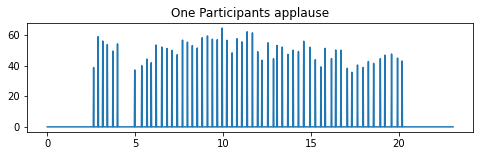

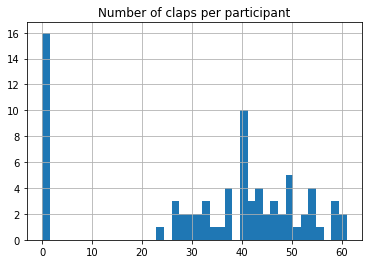

In [19]:
rN = 8
rname = rounds[rN][:-10]
peaks = pd.read_csv('./Data/clapping_data/clapping_peaks/' + rounds[rN])
peaks = peaks.fillna(0)
peaks_IDs = peaks.drop('index',1).columns
ts = pd.Series(np.arange(0,len(peaks))*0.02)
df_claps = pd.DataFrame(index = ts,data = peaks.drop('index',1).values)
df_claps.iloc[:,1].plot(figsize = [8,2])
#plt.xticks(musician_times.TIME,musician_times.LABEL, rotation='vertical')
plt.title('One Participants applause')
plt.savefig('./Some_claps.png',dpi = 300)
plt.show()

# drop the clap amplitude for simpler analysis and count claps per participant
df_OnlyClaps = df_claps.astype(bool).astype(int)
df_OnlyClaps.sum().hist(bins = 40)
plt.title('Number of claps per participant' )
plt.show()

In [4]:
# reduce the analysis set to only those recordings with claps.
a = df_OnlyClaps.sum().index
print([len(a),len(a[df_OnlyClaps.sum()>0])])

# reduce analysis set to only those responses with claps detected
df_claps = df_claps.loc[:,a[df_OnlyClaps.sum()>0]]
claps_ID = peaks_IDs[a[df_OnlyClaps.sum()>0]] # the participant identifiers matching df_clap columns, in case of need
df_claps.columns = range(df_claps.columns.size)
df_OnlyClaps = df_claps.astype(bool).astype(int)

[77, 61]


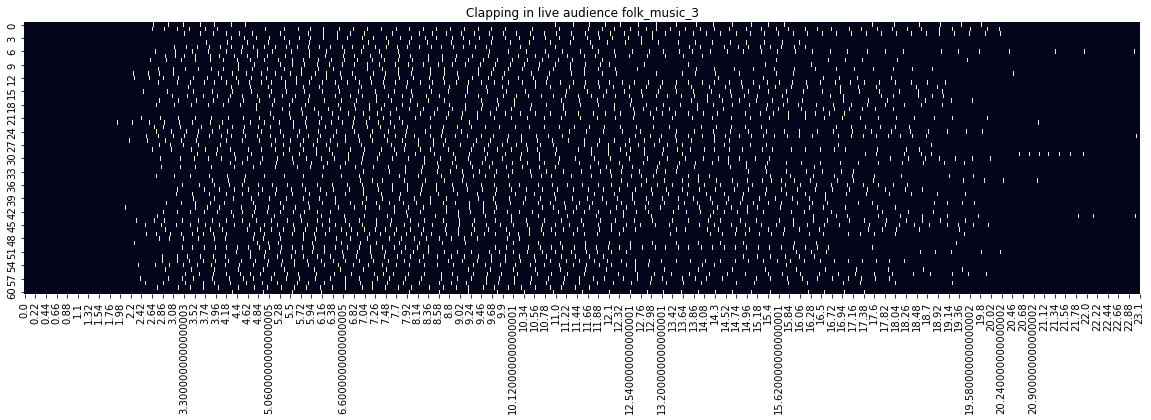

In [5]:
fig, ax = plt.subplots(figsize = [20,5])
chart = sns.heatmap(data=df_OnlyClaps.transpose(), ax=ax,vmin=0, vmax=1,cbar=False)

plt.title('Clapping in live audience ' + rname)
#plt.savefig('claptimes_finale.png')
plt.show()

# this visualisation does not necessarily show all claps, nor is it easy to interpret their alignment.
# use activity levels instead.